In [1]:
%load_ext autoreload
%autoreload 2
%cd ..

%matplotlib inline

/home/mbrzozowski/projects/media_monitoring/roberta_for_longer_texts


In [2]:
import pandas as pd
import numpy as np

from config import VISIBLE_GPUS

import os
os.environ["CUDA_VISIBLE_DEVICES"]= VISIBLE_GPUS
import torch

from sklearn.model_selection import train_test_split
from lib.main import BERTClassificationModelWithPooling

## Load data - sample of IMDB reviews in english

In [3]:
SAMPLE_DATA_PATH = 'test/sample_data/sample_data_eng.csv'

In [4]:
# Loading data for tests
df = pd.read_csv(SAMPLE_DATA_PATH)

texts = df['sentence'].tolist() # list of texts
labels = df['target'].tolist() # list of 0/1 labels


In [5]:
df

,sentence,target
0,I saw this movie not knowing anything about it...,0
1,"OK, don't let my summary fool you. This movie ...",0
2,"This should be re-titled ""The Curious Case Of ...",0
3,Those 2 points are dedicated the reasonable pe...,0
4,Following the success of the (awful) Gilligan'...,0
...,...,...
1995,"What if Marylin Monroe, Albert Einstein, Joe D...",1
1996,Such a film of beauty that it's hard to descri...,1
1997,I saw this movie with my friend and we couldnt...,1
1998,This is the best piece of film ever created It...,1


## Divide to train and test sets

In [6]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(texts, labels, test_size=0.2, random_state=42)

# Method train_and_evaluate

In [7]:
# Loading model
model = BERTClassificationModelWithPooling()

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertModel: ['cls.predictions.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [8]:
results = model.train_and_evaluate(X_train, X_test, y_train, y_test, epochs = 5)

Token indices sequence length is longer than the specified maximum sequence length for this model (1071 > 512). Running this sequence through the model will result in indexing errors


Epoch: 0, Train accuracy: 0.785, Train loss: 0.4539263710565865
Epoch: 0, Test accuracy: 0.8275, Test loss: 0.38338080249726775
Epoch: 1, Train accuracy: 0.941875, Train loss: 0.1923544045118615
Epoch: 1, Test accuracy: 0.895, Test loss: 0.29595350826159117
Epoch: 2, Train accuracy: 0.955625, Train loss: 0.13007455416722224
Epoch: 2, Test accuracy: 0.9075, Test loss: 0.3190570401167497
Epoch: 3, Train accuracy: 0.984375, Train loss: 0.06933444594498724
Epoch: 3, Test accuracy: 0.9025, Test loss: 0.33874595758039505
Epoch: 4, Train accuracy: 0.9875, Train loss: 0.04908364221337251
Epoch: 4, Test accuracy: 0.9025, Test loss: 0.38362644606269897


## Get learning curve

In [12]:
import matplotlib.pyplot as plt

In [13]:
def plot_learning_curve(result):
    cmap = plt.get_cmap("tab10")
    fig,ax = plt.subplots(figsize = (10,10))

    for i, (key,value) in enumerate(result.items()):
        ax.plot(value, '-',label=key,color=cmap(i))
        ax.legend()

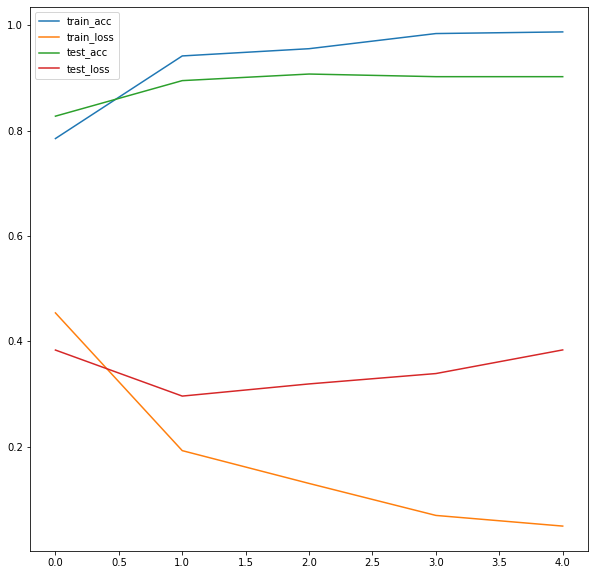

In [14]:
plot_learning_curve(results)